# Figure out WTF is going on w/ PP_1506

In [1]:
import edd_utils as eddu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import random
random.seed(1)

In [2]:
import os
import sys
from pathlib import Path
art_path = '../../'
sys.path.append('.')   # Add local directory to access some of the functions
sys.path.append('../') # Make sure this is the location for the ART library
sys.path.append(art_path)
import warning_utils
warning_utils.filter_end_user_warnings()

import copy
from IPython.display import Image  # Used to display images
import cloudpickle

from art.core import RecommendationEngine
import art.utility as utils

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
TARGET_TO_REMOVE = 'PP_4189'

In [4]:
fig_loc = './dbtl5_figures_and_analysis/'
art_path = 'dbtl5_art_outputs/art.cpkl'
rec_df = pd.read_pickle('./dbtl5_figures_and_analysis/dbtl5_rec_df_filtered_training_data.pkl')
data_df = pd.read_pickle(f'./dbtl5_figures_and_analysis/dbtl3_dbtl4_dbtl5_isoprenol_processed_df.pkl')
filtered_df = pd.read_csv('./dbtl5_figures_and_analysis/filtered_recs_for_dbtl6.csv', index_col = 0).reset_index(drop = True)

In [5]:
rec_df_feature_columns = rec_df.columns[:-2]

In [6]:
filtered_df

,line_name,pp_mean,pp_std,number_of_grna,in_expt,to_rec
0,PP_0368_PP_0751_PP_0815_PP_1506,658.569309,83.455782,4,0,1
1,PP_0368_PP_0751_PP_0814_PP_0815,644.236069,74.957160,4,0,1
2,PP_0368_PP_0528_PP_0751_PP_0815,640.245871,76.839936,4,0,1
3,PP_0368_PP_0812_PP_0815_PP_1506,633.843115,81.926298,4,0,1
4,PP_0368_PP_0814_PP_0815_PP_1769,632.319597,74.842403,4,0,1
5,PP_0528_PP_0751_PP_0815,631.673506,75.858736,3,0,1
6,PP_0368_PP_0751_PP_0813_PP_0815,630.334901,74.955062,4,0,1
7,PP_0528_PP_0751_PP_0815_PP_1769,628.814330,76.130274,4,0,1
8,PP_0751_PP_0813_PP_0815,628.444038,75.023558,3,0,1
9,PP_0368_PP_0751_PP_0815_PP_1769,625.247458,74.980179,4,0,1


In [7]:
filtered_df['has_target'] = filtered_df['line_name'].apply(lambda x: TARGET_TO_REMOVE in x)
filtered_df = filtered_df[filtered_df['has_target']]

In [8]:
def add_sorted_gene_list(line_name_norep):
    return np.sort(re.findall('PP_[0-9]{4}', line_name_norep))

Apply function to add the sorted gene list to the dataframe.

In [9]:
filtered_df.loc[:,'sorted_gene_list']= filtered_df['line_name'].apply(add_sorted_gene_list)
filtered_df.head(3)

/tmp/ipykernel_3854/3153759225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:,'sorted_gene_list']= filtered_df['line_name'].apply(add_sorted_gene_list)


,line_name,pp_mean,pp_std,number_of_grna,in_expt,to_rec,has_target,sorted_gene_list
40,PP_0815_PP_1506_PP_4189,516.848645,76.966618,3,0,1,True,"[PP_0815, PP_1506, PP_4189]"


In [10]:
filtered_df.loc[:,'gene_list_without_target'] = filtered_df['sorted_gene_list'].apply(lambda x: [gene for gene in x if gene != TARGET_TO_REMOVE])

/tmp/ipykernel_3854/2960700979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:,'gene_list_without_target'] = filtered_df['sorted_gene_list'].apply(lambda x: [gene for gene in x if gene != TARGET_TO_REMOVE])


In [11]:
filtered_df.head(3)

,line_name,pp_mean,pp_std,number_of_grna,in_expt,to_rec,has_target,sorted_gene_list,gene_list_without_target
40,PP_0815_PP_1506_PP_4189,516.848645,76.966618,3,0,1,True,"[PP_0815, PP_1506, PP_4189]","[PP_0815, PP_1506]"


In [12]:
rec_df

,PP_0226,PP_0368,PP_0437,PP_0528,PP_0597,PP_0658,PP_0751,PP_0774,PP_0812,PP_0813,...,PP_4550,PP_4651,PP_4667,PP_4678,PP_4679,PP_4862,PP_5186,PP_5288,pp_mean,pp_std
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,167.480254,74.721413
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,167.869381,74.754958
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,254.337062,76.096873
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,238.604231,75.286649
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,283.352039,76.223926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,246.152646,75.859742
425920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,246.152646,75.859742
425921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,246.152646,75.859742
425922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,246.152646,75.859742


In [13]:
print(rec_df_feature_columns)
rec_df['n_grna'] = np.sum(rec_df[rec_df_feature_columns], axis = 1).astype(int)
rec_df

Index(['PP_0226', 'PP_0368', 'PP_0437', 'PP_0528', 'PP_0597', 'PP_0658',
       'PP_0751', 'PP_0774', 'PP_0812', 'PP_0813', 'PP_0814', 'PP_0815',
       'PP_0897', 'PP_0944', 'PP_0999', 'PP_1317', 'PP_1319', 'PP_1444',
       'PP_1457', 'PP_1506', 'PP_1607', 'PP_1620', 'PP_1769', 'PP_2095',
       'PP_2112', 'PP_2136', 'PP_2137', 'PP_2213', 'PP_2339', 'PP_2471',
       'PP_3071', 'PP_3123', 'PP_3365', 'PP_3578', 'PP_3754', 'PP_3755',
       'PP_4011', 'PP_4116', 'PP_4120', 'PP_4121', 'PP_4122', 'PP_4186',
       'PP_4187', 'PP_4188', 'PP_4189', 'PP_4191', 'PP_4192', 'PP_4266',
       'PP_4549', 'PP_4550', 'PP_4651', 'PP_4667', 'PP_4678', 'PP_4679',
       'PP_4862', 'PP_5186', 'PP_5288'],
      dtype='object')


,PP_0226,PP_0368,PP_0437,PP_0528,PP_0597,PP_0658,PP_0751,PP_0774,PP_0812,PP_0813,...,PP_4651,PP_4667,PP_4678,PP_4679,PP_4862,PP_5186,PP_5288,pp_mean,pp_std,n_grna
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,167.480254,74.721413,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,167.869381,74.754958,1
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,254.337062,76.096873,1
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,238.604231,75.286649,1
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,283.352039,76.223926,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,246.152646,75.859742,4
425920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,246.152646,75.859742,4
425921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,246.152646,75.859742,4
425922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,246.152646,75.859742,4


In [14]:
filtered_df.loc[:, 'titer_without_target'] = 0
for idx, srs in filtered_df.iterrows():
    columns_with_ones = srs['gene_list_without_target']
    number_of_grna_target = len(srs['gene_list_without_target'])
    rec_idx = (np.all(np.array([rec_df[c] == 1 for c in columns_with_ones]), axis = 0)) & (rec_df['n_grna'] == number_of_grna_target)
    assert sum(rec_idx) == 1, f'ERROR: either no recs found or more than one matching rec found. Sum(rec_idx) = {sum(rec_idx)}, {np.where(rec_idx)}'
    rec_df_iloc = np.where(rec_idx)[0][0]
    print(f'Columns Im looking for: {columns_with_ones}')
    print(f'Nonzero columns in rec_df: {rec_df.iloc[rec_df_iloc, np.where(rec_df.iloc[rec_df_iloc, :] == 1)[0]]}')
    filtered_df.loc[idx, 'titer_without_target'] = rec_df.iloc[rec_df_iloc, list(rec_df.columns).index('pp_mean')]
    


Columns Im looking for: ['PP_0815', 'PP_1506']
Nonzero columns in rec_df: PP_0815    1.0
PP_1506    1.0
Name: 626, dtype: float64


/tmp/ipykernel_3854/2885392115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'titer_without_target'] = 0
/tmp/ipykernel_3854/2885392115.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '518.8360799483988' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  filtered_df.loc[idx, 'titer_without_target'] = rec_df.iloc[rec_df_iloc, list(rec_df.columns).index('pp_mean')]


In [15]:
rec_df.iloc[[3408, 64278], :]

,PP_0226,PP_0368,PP_0437,PP_0528,PP_0597,PP_0658,PP_0751,PP_0774,PP_0812,PP_0813,...,PP_4651,PP_4667,PP_4678,PP_4679,PP_4862,PP_5186,PP_5288,pp_mean,pp_std,n_grna
3408,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,631.823918,74.946161,3
64278,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,625.247458,74.980179,4


Text(0.5, 1.0, 'Comparing the effects of adding gRNA: PP_4189')

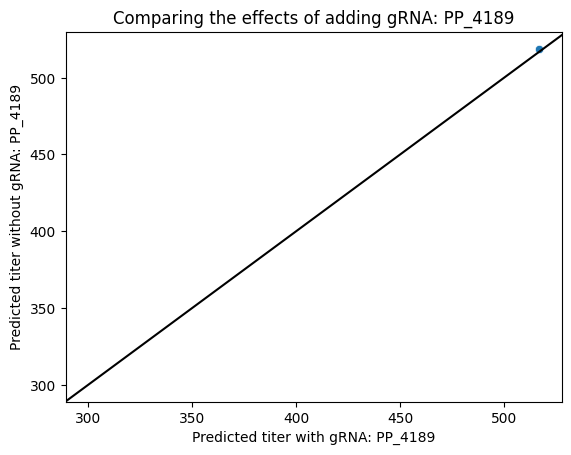

In [16]:
fig, ax = plt.subplots()
sns.scatterplot(data = filtered_df, x = 'pp_mean', y = 'titer_without_target')
ax.axline((300,300), slope = 1, c = 'k')
ax.set_xlabel(f'Predicted titer with gRNA: {TARGET_TO_REMOVE}')
ax.set_ylabel(f'Predicted titer without gRNA: {TARGET_TO_REMOVE}')
ax.set_title(f'Comparing the effects of adding gRNA: {TARGET_TO_REMOVE}')